In [ ]:
!pip install yfinance

In [ ]:
import datetime as dt

# Use https://github.com/pydata/pandas-datareader/issues/868 to overcome the issue with pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
ticker = "SPY"
df = pdr.get_data_yahoo(ticker, dt.datetime(2000, 1,1,1), dt.datetime(2021, 1,1))

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

Open       High         Low     Close  Adj Close    Volume
Date                                                                       
2000-01-03  148.25000  148.25000  143.875000  145.4375  93.591125   8164300
2000-01-04  143.53125  144.06250  139.640625  139.7500  89.931137   8089800
2000-01-05  139.93750  141.53125  137.250000  140.0000  90.092026  12177900
2000-01-06  139.62500  141.50000  137.750000  137.7500  88.644081   6227200
2000-01-07  140.31250  145.75000  140.062500  145.7500  93.792252   8066500

In [ ]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  5284.000000  5284.000000  5284.000000  5284.000000  5284.000000   
mean    165.451473   166.431146   164.374072   165.451301   134.416084   
std      67.208019    67.434529    66.947132    67.212942    71.177648   
min      67.949997    70.000000    67.099998    68.110001    51.020763   
25%     116.742500   117.500000   115.697498   116.599998    82.861414   
50%     138.843750   139.740005   137.719376   138.679993   101.740608   
75%     207.169998   208.182495   205.942493   207.264996   177.970661   
max     373.809998   378.459991   371.570007   373.880005   356.528259   

             Volume  
count  5.284000e+03  
mean   1.116418e+08  
std    9.744375e+07  
min    1.436600e+06  
25%    4.870642e+07  
50%    8.238225e+07  
75%    1.486030e+08  
max    8.710263e+08

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2000-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5284 non-null   float64
 1   High       5284 non-null   float64
 2   Low        5284 non-null   float64
 3   Close      5284 non-null   float64
 4   Adj Close  5284 non-null   float64
 5   Volume     5284 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.0 KB


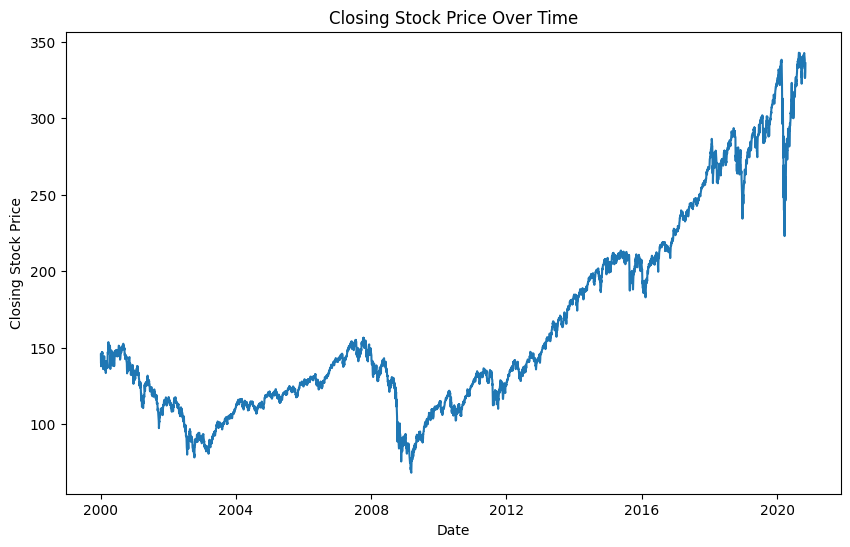

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

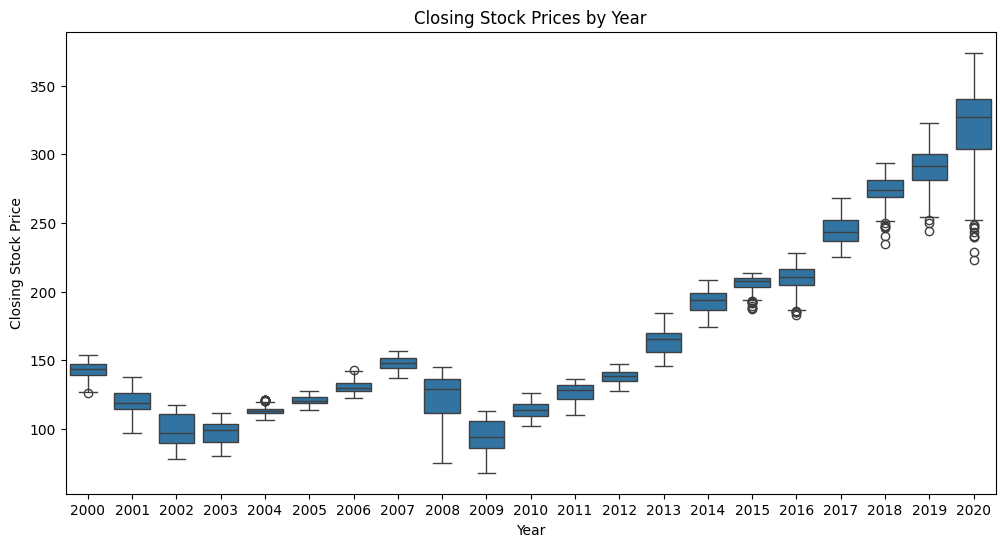

In [ ]:

df.reset_index(inplace=True)

df['year'] = pd.to_datetime(df['Date']).dt.year

plt.figure(figsize=(12, 6))

sns.boxplot(x='year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()


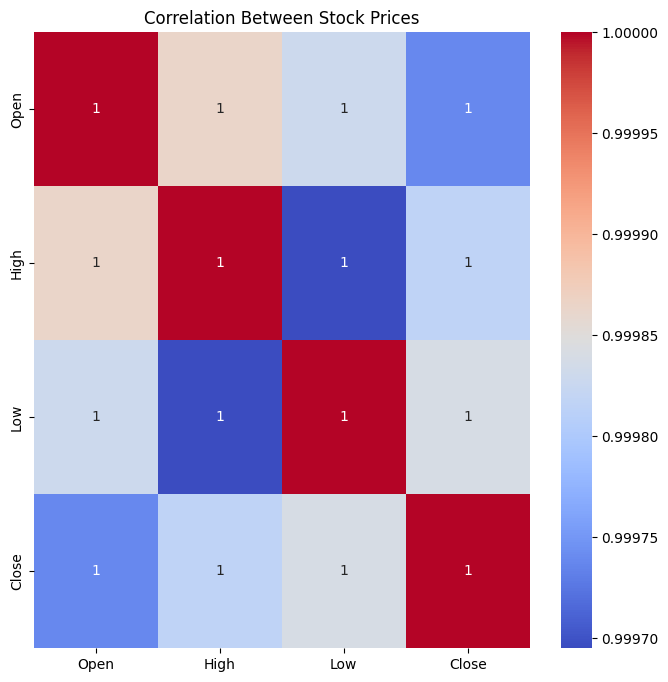

In [ ]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

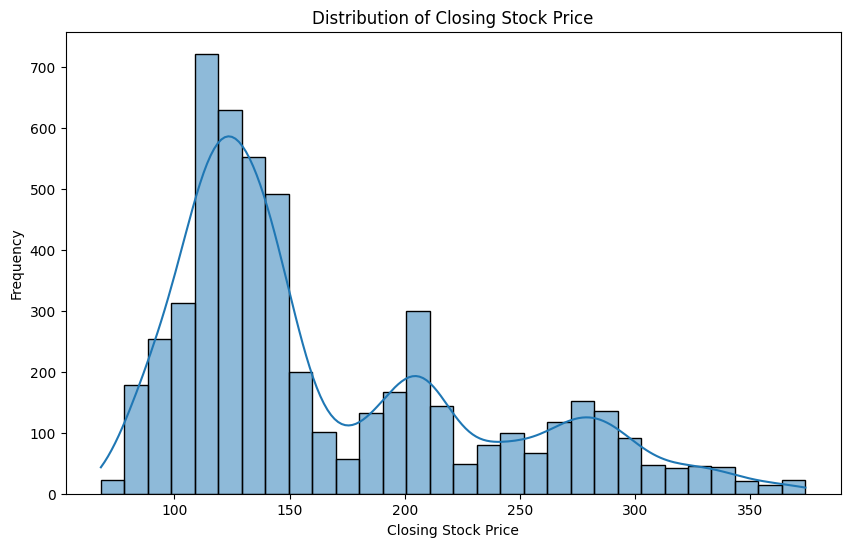

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import datetime as dt
import pandas as pd
import yfinance as yf

def get_historical_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            df = yf.download(ticker, start=start_date, end=end_date)
            df['Ticker'] = ticker  # Adding a column for ticker symbol
            data = pd.concat([data, df])
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

tickers = [
    'AAPL', 'BAC', 'AMZN', 'T', 'GOOG', 'MO', 'DAL', 'AA', 'AXP', 'DD', 'BABA', 'ABT', 'UA', 'AMAT', 'AMGN',
    'AAL', 'AIG', 'ALL', 'ADBE', 'GOOGL', 'ACN', 'ABBV', 'MT', 'LLY', 'AGN', 'APA', 'ADP', 'APC', 'AKAM',
    'NLY', 'ABX', 'ATVI', 'ADSK', 'ADM', 'BMH.AX', 'WBA', 'ARNA', 'LUV', 'ACAD', 'PANW', 'AMD', 'AET', 'AEP',
    'ALXN', 'CLMS', 'AVGO', 'EA', 'DB', 'RAI', 'AEM', 'APD', 'AMBA', 'NVS', 'APOL', 'ANF', 'LULU', 'RAD',
    'BRK.AX', 'ARRY', 'AGNC', 'JBLU', 'A', 'ORLY', 'FOLD', 'AZO', 'ATML', 'AN', 'AZN', 'AES', 'GAS', 'BUD',
    'ARR', 'BDX', 'AKS', 'AB', 'ACOR', 'CS', 'AFL', 'ADI', 'AEGR', 'ACIW', 'AMP', 'AVP', 'AMTD', 'AEO', 'AWK',
    'NVO', 'ALTR', 'ALK', 'PAA', 'MTU.AX', 'ARCC', 'AAP', 'NAT', 'FNMA', 'FAV', 'AIV', 'AGIO', 'AEE', 'UBS'
]
  # Example list of tickers
start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime(2021, 1, 1)

historical_data = get_historical_data(tickers, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

                Open      High       Low     Close  Adj Close       Volume  \
Date                                                                         
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127  535796800.0   
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790  512377600.0   
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128  778321600.0   
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718097  767972800.0   
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113  460734400.0   

           Ticker  
Date               
2000-01-03   AAPL  
2000-01-04   AAPL  
2000-01-05   AAPL  
2000-01-06   AAPL  
2000-01-07   AAPL  


In [ ]:
historical_data.sample(10)

Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2013-11-13  20.010000  21.770000  20.010000  21.500000  21.500000     86100.0   
2010-08-05   7.490000   7.620000   7.450000   7.500000   7.500000  14581900.0   
2012-07-05  40.990002  41.209999  40.779999  41.040001  26.679476   3936000.0   
2008-11-11   6.000000   6.450000   5.720000   6.130000   6.130000   2813800.0   
2009-08-17  33.520634  33.590870  33.011414  33.028973  23.090998   4075114.0   
2010-03-02  25.170000  25.360001  25.129999  25.330000  14.925878   1253100.0   
2008-07-03  11.900000  11.900000  11.200000  11.600000  11.600000      3967.0   
2005-02-28  19.754999  19.855000  19.500000  19.570000   5.381309    369200.0   
2020-04-29  45.419998  45.419998  43.410000  43.549999  43.549999    669900.0   
2013-03-21  31.355000  31.639999  30.725000  30.924999  27.809656   1223800.0   

            Ticker  
Date                
2013-11-13    AGIO  
2010-08-05     AMD  
2012-07-05     AEP  
2008-11-11      AN  
2009-08-17     ADP  
2010-03-02     AEE  
2008-07-03  BRK.AX  
2005-02-28     PAA  
2020-04-29    AGIO  
2013-03-21     ALK

In [ ]:
import pandas as pd

historical_data.to_csv('stock_market_data.csv')  # Set index=False to exclude row indices from the CSV file


In [ ]:
returns = historical_data.pivot(columns='Ticker', values='Adj Close').pct_change().fillna(0).transpose()

returns.describe()

array([[ 0.        , -0.07638918, -0.06203023, ..., -0.00509209,
         0.00136483,  0.00937041],
       [ 0.        ,  0.00463302,  0.05764793, ..., -0.00899252,
         0.04128853,  0.00435703],
       [ 0.        ,  0.        ,  0.        , ..., -0.01245329,
         0.01828499, -0.02352936],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.02072195,
         0.02935156, -0.01326259],
       [ 0.        ,  0.        ,  0.        , ...,  0.00213066,
        -0.00354358,  0.00497874],
       [ 0.        , -0.03719936,  0.01136396, ..., -0.00630351,
        -0.00177631,  0.01372651]])

In [ ]:
returns

Date    2000-01-03  2000-01-04  2000-01-05  2000-01-06  2000-01-07  \
Ticker                                                               
A              0.0   -0.076389   -0.062030   -0.038076    0.083333   
AA             0.0    0.004633    0.057648   -0.013081   -0.002946   
AAL            0.0    0.000000    0.000000    0.000000    0.000000   
AAP            0.0    0.000000    0.000000    0.000000    0.000000   
AAPL           0.0   -0.084310    0.014633   -0.086539    0.047369   
...            ...         ...         ...         ...         ...   
PANW           0.0    0.000000    0.000000    0.000000    0.000000   
T              0.0   -0.058511    0.015537   -0.019376    0.008572   
UA             0.0    0.000000    0.000000    0.000000    0.000000   
UBS            0.0    0.000000    0.000000    0.000000    0.000000   
WBA            0.0   -0.037199    0.011364   -0.029214    0.025463   

Date    2000-01-10  2000-01-11  2000-01-12  2000-01-13  2000-01-14  ...  \
Ticker                                                              ...   
A         0.060577   -0.013599   -0.020221    0.015009    0.011091  ...   
AA       -0.002954   -0.005926   -0.008942   -0.018045   -0.019908  ...   
AAL       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
AAP       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
AAPL     -0.017588   -0.051151   -0.059972    0.109677    0.038114  ...   
...            ...         ...         ...         ...         ...  ...   
PANW      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
T         0.014164   -0.013966   -0.052408   -0.023917    0.029097  ...   
UA        0.000000    0.000000    0.000000    0.000000    0.000000  ...   
UBS       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
WBA       0.029345    0.039474    0.021097   -0.002066   -0.024845  ...   

Date    2020-12-17  2020-12-18  2020-12-21  2020-12-22  2020-12-23  \
Ticker                                                               
A         0.014756    0.002774   -0.012741   -0.003481   -0.000596   
AA        0.027803   -0.007665    0.004543   -0.022614    0.028228   
AAL      -0.003559   -0.017262   -0.024833   -0.038509    0.026486   
AAP      -0.004532   -0.002183    0.003125   -0.006792   -0.000690   
AAPL      0.006963   -0.015851    0.012396    0.028464   -0.006976   
...            ...         ...         ...         ...         ...   
PANW      0.024959    0.072812    0.001378    0.045054   -0.019459   
T        -0.022119   -0.007428   -0.013265   -0.021027    0.012324   
UA       -0.003924   -0.008536   -0.000662   -0.027170    0.027929   
UBS      -0.007037   -0.003544   -0.018492   -0.008696    0.032164   
WBA       0.010880   -0.004648   -0.000491   -0.034424    0.015279   

Date    2020-12-24  2020-12-28  2020-12-29  2020-12-30  2020-12-31  
Ticker                                                              
A         0.000085    0.004433   -0.005092    0.001365    0.009370  
AA       -0.011701    0.012750   -0.008993    0.041289    0.004357  
AAL      -0.014475    0.025543   -0.012453    0.018285   -0.023529  
AAP       0.008726   -0.011700   -0.013287    0.006191   -0.000951  
AAPL      0.007712    0.035766   -0.013315   -0.008526   -0.007703  
...            ...         ...         ...         ...         ...  
PANW      0.006359   -0.015416   -0.014607   -0.001151   -0.001124  
T        -0.002087   -0.004880   -0.000350   -0.001752    0.009477  
UA       -0.002651   -0.005980   -0.020722    0.029352   -0.013263  
UBS      -0.003541    0.000711    0.002131   -0.003544    0.004979  
WBA      -0.006270    0.001010   -0.006304   -0.001776    0.013727  

[83 rows x 5380 columns]

In [ ]:
def embed_data(data):
    pca = PCA(n_components=3)
    embedded_data = pca.fit_transform(data)
    return embedded_data

embedded_returns = embed_data(returns.values)

In [ ]:
len(embedded_returns)

83

In [ ]:
import pandas as pd
import numpy as np

embedded_values = embedded_returns

embedded_array = np.array(embedded_values)

correlation_matrix = np.corrcoef(embedded_array)

correlation_table = pd.DataFrame(correlation_matrix)

print(correlation_table)


          0         1         2         3         4         5         6   \
0   1.000000  0.588271  0.251473 -0.902781  0.897520  0.694734 -0.720593   
1   0.588271  1.000000  0.930611 -0.878887  0.171386  0.990337 -0.984598   
2   0.251473  0.930611  1.000000 -0.643305 -0.201100  0.870860 -0.852287   
3  -0.902781 -0.878887 -0.643305  1.000000 -0.620600 -0.936550  0.948752   
4   0.897520  0.171386 -0.201100 -0.620600  1.000000  0.306360 -0.340994   
..       ...       ...       ...       ...       ...       ...       ...   
78 -0.681982 -0.992622 -0.879366  0.930243 -0.289578 -0.999845  0.998532   
79 -0.730648 -0.981938 -0.844552  0.953268 -0.354694 -0.998688  0.999893   
80 -0.752773 -0.975162 -0.826428  0.962716 -0.385345 -0.996456  0.998867   
81  0.591850  0.999990  0.928980 -0.880993  0.175751  0.990942 -0.985363   
82 -0.831418 -0.938431 -0.746871  0.989573 -0.501188 -0.977273  0.984377   

          7         8         9   ...        73        74        75        76  \
0  -0.

In [ ]:
import pandas as pd
import numpy as np

# Index names
index_names = ['APD', 'WBA', 'DD', 'EA', 'AAP', 'DB', 'ARRY', 'ANF', 'AVGO', 'LULU', 'AGNC', 'LUV', 'LLY', 'GAS', 'BAC', 'ARR', 'AAPL', 'ARCC', 'MT', 'AN', 'UBS', 'T', 'AKAM', 'AEP', 'AZN', 'BRK.AX', 'AMGN', 'AB', 'NVS', 'GOOGL', 'AWK', 'NAT', 'AA', 'ABT', 'AEM', 'AMBA', 'ADI', 'UA', 'GOOG', 'AXP', 'ACN', 'ADSK', 'AIV', 'AAL', 'BUD', 'AGIO', 'ACIW', 'AMAT', 'AMD', 'BDX', 'ACOR', 'ORLY', 'ALK', 'AMTD', 'ADBE', 'NVO', 'AES', 'APA', 'BMH.AX', 'ADP', 'FNMA', 'BABA', 'A', 'AET', 'AZO', 'AMZN', 'PANW', 'ACAD', 'AFL', 'PAA', 'JBLU', 'ALL', 'AEO', 'ABBV', 'AEE', 'ALTR', 'AIG', 'NLY', 'AMP', 'FOLD', 'ADM', 'DAL', 'MO']

correlation_values = correlation_matrix

correlation_df = pd.DataFrame(correlation_values, index=index_names, columns=index_names)

correlation_df


APD       WBA        DD        EA       AAP        DB      ARRY  \
APD   1.000000  0.588271  0.251473 -0.902781  0.897520  0.694734 -0.720593   
WBA   0.588271  1.000000  0.930611 -0.878887  0.171386  0.990337 -0.984598   
DD    0.251473  0.930611  1.000000 -0.643305 -0.201100  0.870860 -0.852287   
EA   -0.902781 -0.878887 -0.643305  1.000000 -0.620600 -0.936550  0.948752   
AAP   0.897520  0.171386 -0.201100 -0.620600  1.000000  0.306360 -0.340994   
...        ...       ...       ...       ...       ...       ...       ...   
AMP  -0.681982 -0.992622 -0.879366  0.930243 -0.289578 -0.999845  0.998532   
FOLD -0.730648 -0.981938 -0.844552  0.953268 -0.354694 -0.998688  0.999893   
ADM  -0.752773 -0.975162 -0.826428  0.962716 -0.385345 -0.996456  0.998867   
DAL   0.591850  0.999990  0.928980 -0.880993  0.175751  0.990942 -0.985363   
MO   -0.831418 -0.938431 -0.746871  0.989573 -0.501188 -0.977273  0.984377   

           ANF      AVGO      LULU  ...      ABBV       AEE      ALTR  \
APD  -0.752801 -0.310714  0.983567  ... -0.992718 -0.722610 -0.688916   
WBA  -0.975152  0.585854  0.724604  ... -0.681400 -0.984084 -0.991422   
DD   -0.826404  0.841822  0.422083  ... -0.366233 -0.850759 -0.874792   
EA    0.962728 -0.128307 -0.965597  ...  0.948017  0.949668  0.933695   
AAP  -0.385384 -0.698019  0.803156  ... -0.837864 -0.343731 -0.298680   
...        ...       ...       ...  ...       ...       ...       ...   
AMP   0.994819 -0.483267 -0.802820  ...  0.765118  0.998370  0.999955   
FOLD  0.999454 -0.421938 -0.841909  ...  0.807573  0.999932  0.998244   
ADM   1.000000 -0.391801 -0.859251  ...  0.826589  0.999001  0.995746   
DAL  -0.976125  0.582256  0.727651  ... -0.684638 -0.984862 -0.991992   
MO    0.991646 -0.269812 -0.918074  ...  0.892298  0.984886  0.975533   

           AIG       NLY       AMP      FOLD       ADM       DAL        MO  
APD  -0.472675 -0.944991 -0.681982 -0.730648 -0.752773  0.591850 -0.831418  
WBA  -0.990685 -0.820421 -0.992622 -0.981938 -0.975162  0.999990 -0.938431  
DD   -0.971783 -0.554224 -0.879366 -0.844552 -0.826428  0.928980 -0.746871  
EA    0.805743  0.993804  0.930243  0.953268  0.962716 -0.880993  0.989573  
AAP  -0.035634 -0.703908 -0.289578 -0.354694 -0.385345  0.175751 -0.501188  
...        ...       ...       ...       ...       ...       ...       ...  
AMP   0.966865  0.883695  1.000000  0.997634  0.994823 -0.993150  0.973396  
FOLD  0.947028  0.913782  0.997634  1.000000  0.999456 -0.982767  0.986845  
ADM   0.935918  0.926684  0.994823  0.999456  1.000000 -0.976134  0.991641  
DAL  -0.990072 -0.822947 -0.993150 -0.982767 -0.976134  1.000000 -0.939953  
MO    0.882648  0.967432  0.973396  0.986845  0.991641 -0.939953  1.000000  

[83 rows x 83 columns]

In [ ]:
correlation_df.reset_index(inplace=True)

correlation_df.rename(columns={'index': 'Source'}, inplace=True)

melted_df = correlation_df.melt(id_vars='Source', var_name='Target', value_name='Correlation')

print(melted_df)


     Source Target  Correlation
0       APD    APD     1.000000
1       WBA    APD     0.588271
2        DD    APD     0.251473
3        EA    APD    -0.902781
4       AAP    APD     0.897520
...     ...    ...          ...
6884    AMP     MO     0.973396
6885   FOLD     MO     0.986845
6886    ADM     MO     0.991641
6887    DAL     MO    -0.939953
6888     MO     MO     1.000000

[6889 rows x 3 columns]


In [ ]:
melted_df.to_csv('correlation_data.csv', index=False)

In [ ]:
graphml_content = '''<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns">
    <key attr.name="label" attr.type="string" for="node" id="label"/>
    <key attr.name="weight" attr.type="double" for="edge" id="weight"/>
    <graph edgedefault="undirected">
'''

for index, row in melted_df.iterrows():
    graphml_content += f'        <node id="{row["Source"]}">\n'
    graphml_content += f'            <data key="label">{row["Source"]}</data>\n'
    graphml_content += '        </node>\n'
    graphml_content += f'        <node id="{row["Target"]}">\n'
    graphml_content += f'            <data key="label">{row["Target"]}</data>\n'
    graphml_content += '        </node>\n'
    graphml_content += f'        <edge source="{row["Source"]}" target="{row["Target"]}">\n'
    graphml_content += f'            <data key="weight">{row["Correlation"]}</data>\n'
    graphml_content += '        </edge>\n'

graphml_content += '''    </graph>
</graphml>
'''

with open('graph_data.graphml', 'w') as file:
    file.write(graphml_content)

print("GraphML file generated successfully.")


GraphML file generated successfully.


# Graph EDA and visualization

In [ ]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.9 MB/s eta 0:00:00


In [ ]:
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten

correlation_data = pd.read_csv('correlation_data.csv')

stock_market_data = pd.read_csv('stock_market_data.csv')

merged_data = pd.merge(stock_market_data, correlation_data, left_on='Ticker', right_on='Source', how='inner')

# Define function to construct graph
def construct_graph(data):
    G = nx.Graph()
    for _, row in data.iterrows():
        G.add_edge(row['Source'], row['Target'], weight=row['Correlation'])
    return G

# Construct graph
stock_graph = construct_graph(correlation_data)

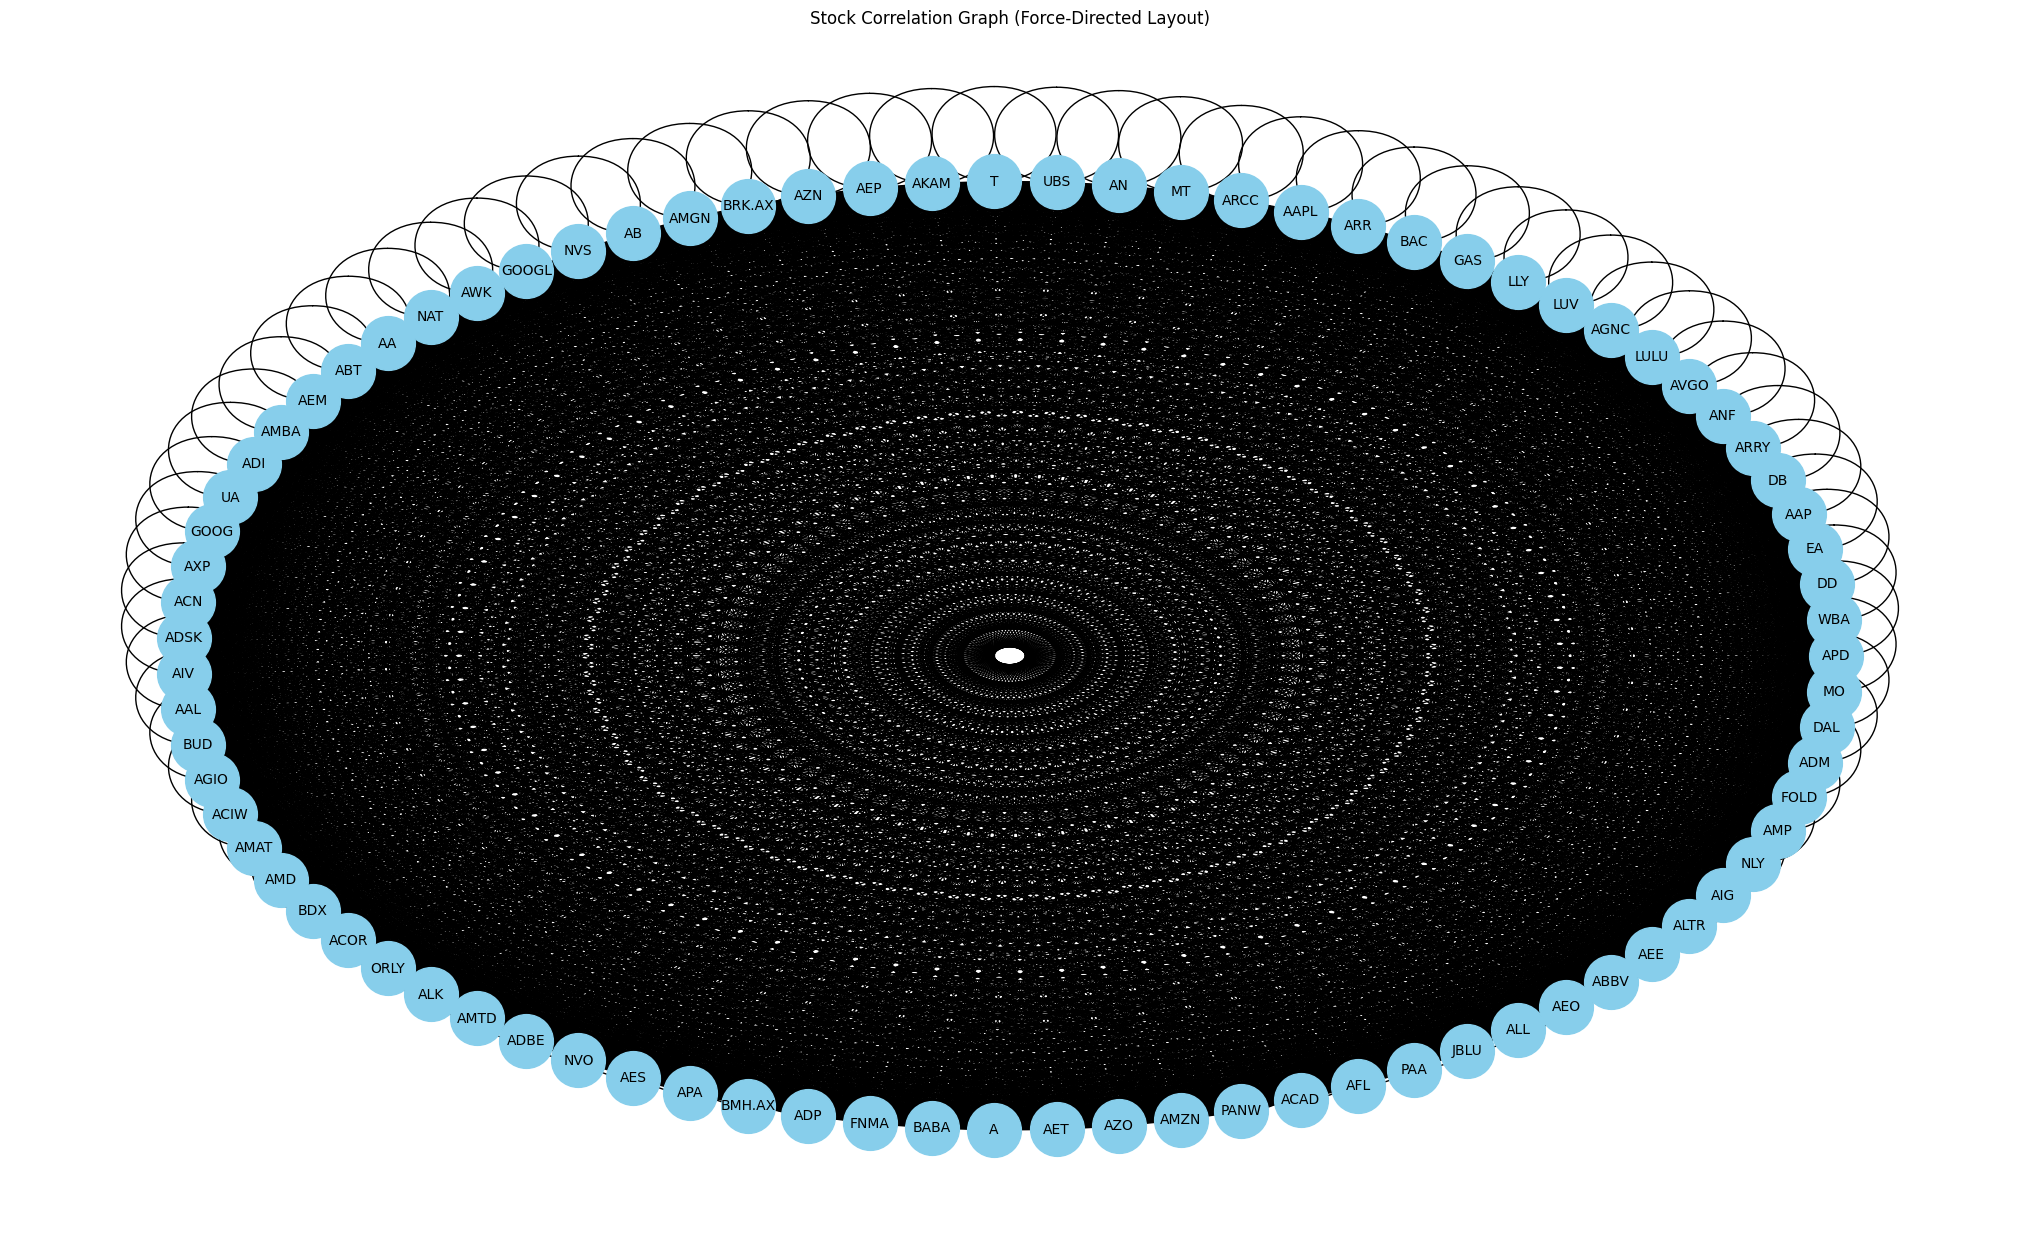

In [ ]:
import matplotlib.pyplot as plt

# Visualize the graph
plt.figure(figsize=(20, 12))
pos = nx.circular_layout(stock_graph)  # Using the spring layout algorithm
nx.draw(stock_graph, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
plt.title('Stock Correlation Graph (Force-Directed Layout)')
plt.show()



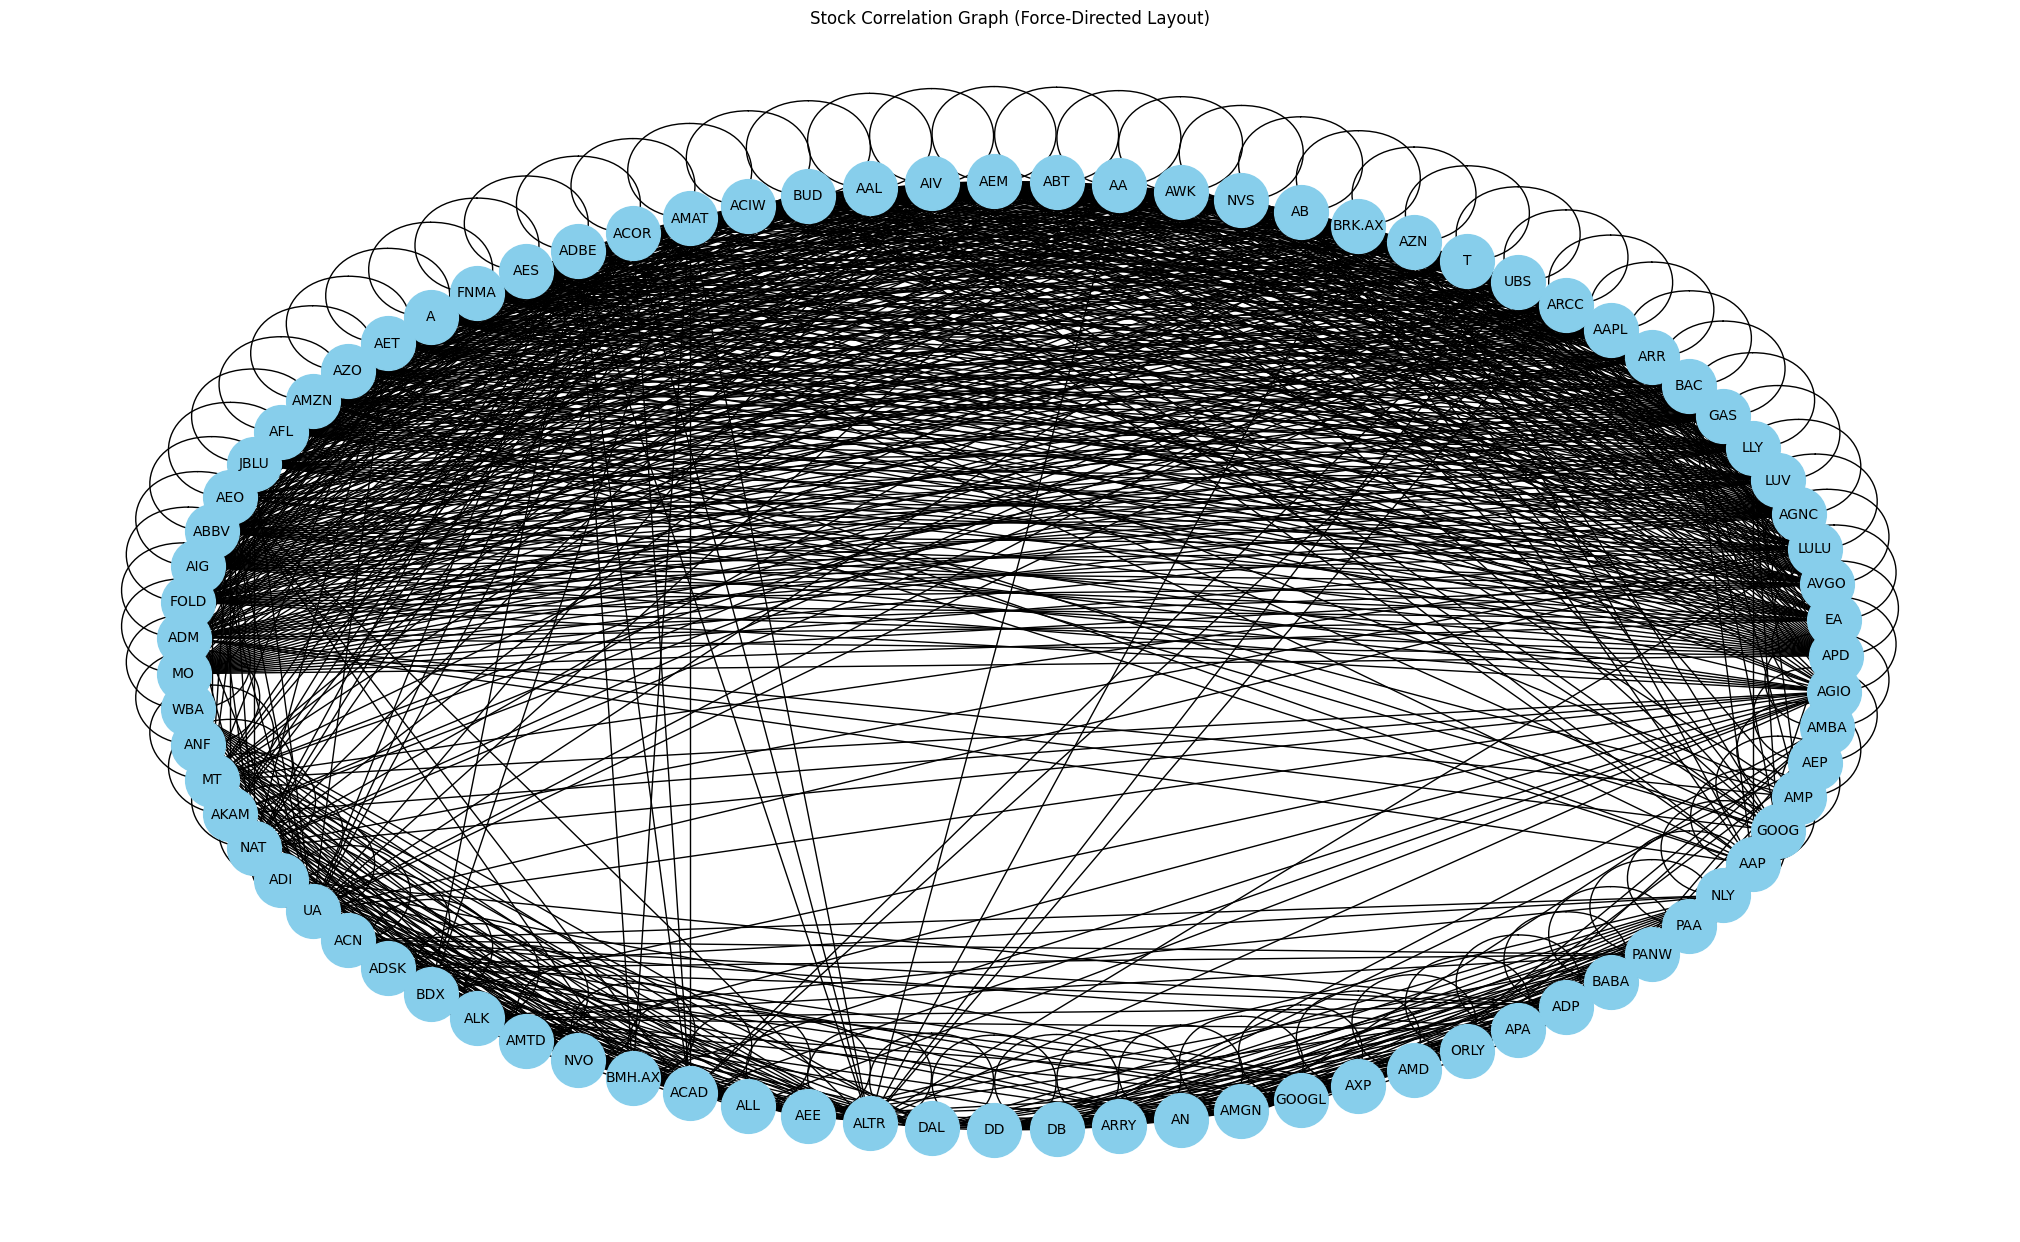

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define your threshold for correlation coefficient
correlation_threshold = 0.9  # Change this value as desired

# Filter edges based on correlation coefficient threshold
filtered_edges = [(source, target) for source, target, weight in stock_graph.edges(data='weight') if abs(weight) >= correlation_threshold]

# Create a new graph with filtered edges
filtered_graph = nx.Graph()
filtered_graph.add_edges_from(filtered_edges)

# Visualize the graph
plt.figure(figsize=(30, 20))
pos = nx.circular_layout(filtered_graph)  # Using the spring layout algorithm
nx.draw(filtered_graph, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
plt.title('Stock Correlation Graph (Force-Directed Layout)')
plt.show()


**ConvLSTM**

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 4s 26ms/step - loss: 0.0027 - val_loss: 7.8415e-04
Epoch 2/100
68/68 [==============================] - 2s 33ms/step - loss: 3.5449e-05 - val_loss: 4.3722e-04
Epoch 3/100
68/68 [==============================] - 3s 40ms/step - loss: 3.2947e-05 - val_loss: 4.2303e-04
Epoch 4/100
68/68 [==============================] - 3s 37ms/step - loss: 3.4157e-05 - val_loss: 4.1141e-04
Epoch 5/100
68/68 [==============================] - 3s 38ms/step - loss: 3.4099e-05 - val_loss: 3.5813e-04
Epoch 6/100
68/68 [==============================] - 2s 36ms/step - loss: 3.3170e-05 - val_loss: 3.8209e-04
Epoch 7/100
68/68 [==============================] - 3s 48ms/step - loss: 3.2030e-05 - val_loss: 4.1160e-04
Epoch 8/100
68/68 [==============================] - 2s 35ms/step - loss: 3.4385e-05 - val_loss: 5.3146e-04
Epoch 9/100
68/68 [==============================] - 2s 36ms/step - loss: 3.1215e-05 - val_loss: 5.2072e-04
Epoch 10/100
68/68 [============

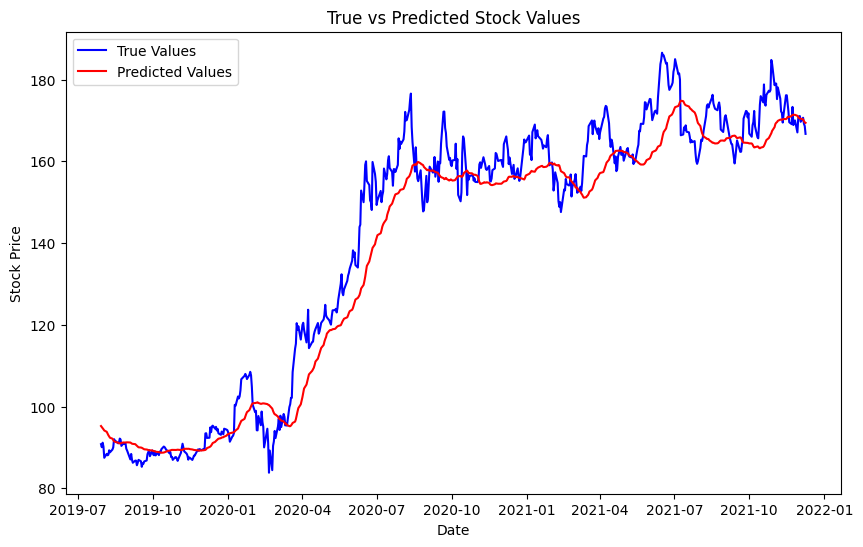

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for ConvLSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for ConvLSTM
X, y = prepare_data(scaled_data, n_steps)

# Reshape data for ConvLSTM (samples, timesteps, rows, columns, features)
n_features = 1
n_seq = 2
n_steps = 15
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build ConvLSTM model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 64.62154009089332
Mean Absolute Error (MAE): 6.135544702087301
Mean Absolute Percentage Error (MAPE): 4.281486646210547


# Combining Relational Graph with ConvLSTM and GCN for Mutation Points

Enter the target stock ticker: AMZN
Most related stocks for AMZN : ['AMZN', 'LLY', 'AZO', 'AZN', 'ABT']
Epoch 1/10
453/453 [==============================] - 18s 16ms/step - loss: 1.2745e-04 - val_loss: 0.0015
Epoch 2/10
453/453 [==============================] - 5s 11ms/step - loss: 2.4975e-05 - val_loss: 0.0013
Epoch 3/10
453/453 [==============================] - 3s 8ms/step - loss: 2.3998e-05 - val_loss: 0.0012
Epoch 4/10
453/453 [==============================] - 4s 8ms/step - loss: 2.0608e-05 - val_loss: 0.0010
Epoch 5/10
453/453 [==============================] - 4s 8ms/step - loss: 2.0344e-05 - val_loss: 9.5102e-04
Epoch 6/10
453/453 [==============================] - 6s 14ms/step - loss: 2.5264e-05 - val_loss: 0.0010
Epoch 7/10
453/453 [==============================] - 8s 17ms/step - loss: 1.7524e-05 - val_loss: 6.3722e-04
Epoch 8/10
453/453 [==============================] - 7s 16ms/step - loss: 1.4447e-05 - val_loss: 5.1496e-04
Epoch 9/10
453/453 [==========================

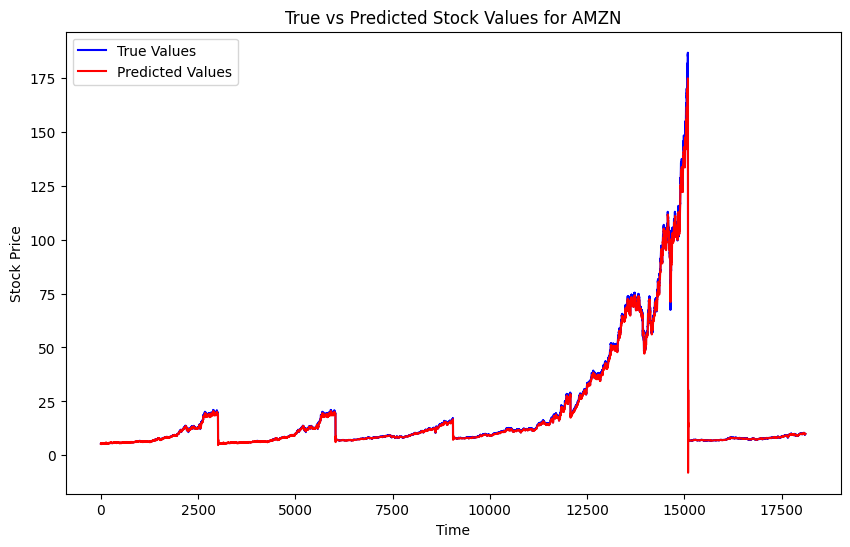

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from collections import deque

# Load correlation data
correlation_data = pd.read_csv('correlation_data.csv')

# Define function to get the most related stocks for a given stock
def get_related_stocks(stock_ticker, correlation_data, top_n=5):
    related_stocks = correlation_data[correlation_data['Source'] == stock_ticker]
    related_stocks = related_stocks.sort_values(by='Correlation', ascending=False).head(top_n)
    return related_stocks['Target'].tolist()

# Get stock ticker from user
target_stock_ticker = input("Enter the target stock ticker: ")

# Get the most related stocks for the user-given stock
related_stocks = get_related_stocks(target_stock_ticker, correlation_data)

# Print the most related stocks
print("Most related stocks for", target_stock_ticker, ":", related_stocks)

# Load stock market data
stock_market_data = pd.read_csv('stock_market_data.csv')

# Define function to get data for a specific stock and its related stocks
def get_stock_data(stock_ticker, related_stocks):
    # Get data for the target stock
    target_stock_data = stock_market_data[stock_market_data['Ticker'] == stock_ticker]

    # Get data for related stocks
    related_stocks_data = stock_market_data[stock_market_data['Ticker'].isin(related_stocks)]

    return target_stock_data, related_stocks_data

# Define function to prepare data for the model
def prepare_data(target_stock_data, related_stocks_data, window_size):
    scaler = MinMaxScaler()

    # Combine target stock and related stocks data
    all_data = pd.concat([target_stock_data, related_stocks_data])

    # Normalize data
    scaled_data = scaler.fit_transform(all_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

    # Prepare input sequences
    X = []
    y = []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size][3])  # Predicting the 'Close' price of the target stock
    X = np.array(X)
    y = np.array(y)

    return X, y

# Define function to build ConvLSTM model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Get data for target stock and related stocks
target_stock_data, related_stocks_data = get_stock_data(target_stock_ticker, related_stocks)

# Prepare data for the model
window_size = 10
X, y = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape data for ConvLSTM input
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Build and train the model
model = build_model((X.shape[1], X.shape[2]))
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Test the model and predict values
# Prepare test data
X_test, y_test = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape test data for ConvLSTM input
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Predict using the trained model
y_pred = model.predict(X_test)

# Inverse scaling for predictions
scaler_output = MinMaxScaler()
scaler_output.fit(target_stock_data[['Close']])
y_test_inv = scaler_output.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_output.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values', color='blue')
plt.plot(y_pred_inv, label='Predicted Values', color='red')
plt.title('True vs Predicted Stock Values for ' + target_stock_ticker)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 2.6826698981075556
Mean Absolute Error (MAE): 0.38001713438795426
Mean Absolute Percentage Error (MAPE): 1.7674379447930872


**LSTM**

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 3s 17ms/step - loss: 0.0018 - val_loss: 2.9223e-04
Epoch 2/100
68/68 [==============================] - 1s 13ms/step - loss: 4.1598e-05 - val_loss: 5.8505e-04
Epoch 3/100
68/68 [==============================] - 1s 13ms/step - loss: 1.7503e-05 - val_loss: 2.1130e-04
Epoch 4/100
68/68 [==============================] - 1s 13ms/step - loss: 1.6665e-05 - val_loss: 2.3601e-04
Epoch 5/100
68/68 [==============================] - 1s 13ms/step - loss: 1.6723e-05 - val_loss: 2.5895e-04
Epoch 6/100
68/68 [==============================] - 1s 13ms/step - loss: 1.6008e-05 - val_loss: 2.9505e-04
Epoch 7/100
68/68 [==============================] - 1s 20ms/step - loss: 1.5400e-05 - val_loss: 3.3113e-04
Epoch 8/100
68/68 [==============================] - 1s 19ms/step - loss: 1.5213e-05 - val_loss: 2.6430e-04
Test MSE: 0.0060843201354146
19/19 [==============================] - 0s 5ms/step


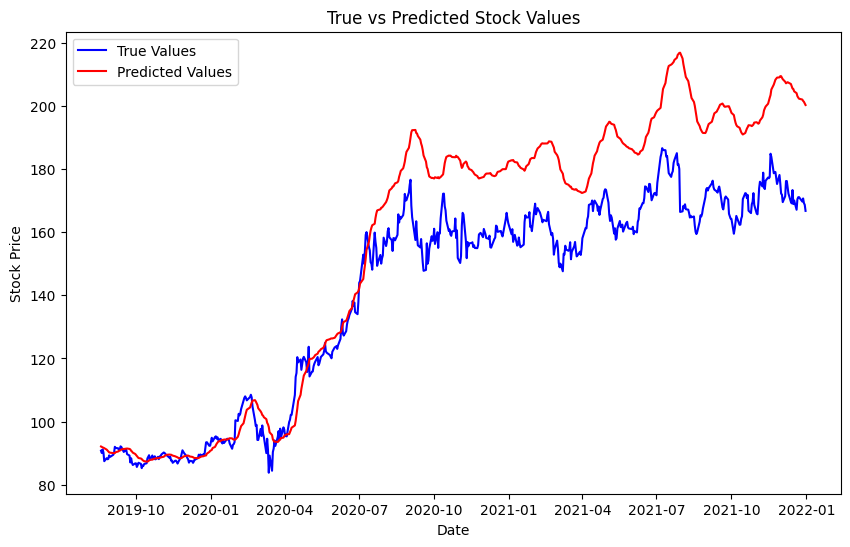

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for LSTM
X, y = prepare_data(scaled_data, n_steps)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 399.2737854198427
Mean Absolute Error (MAE): 15.960348661037438
Mean Absolute Percentage Error (MAPE): 10.104235179942263


# Combining Relational Graph with LSTM and GCN for Mutation Points

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 3s 27ms/step - loss: 10.1209 - val_loss: 5.2828
Epoch 2/100
68/68 [==============================] - 3s 38ms/step - loss: 0.7530 - val_loss: 4.9778
Epoch 3/100
68/68 [==============================] - 2s 37ms/step - loss: 0.5617 - val_loss: 4.0730
Epoch 4/100
68/68 [==============================] - 2s 31ms/step - loss: 0.4879 - val_loss: 3.2916
Epoch 5/100
68/68 [==============================] - 2s 29ms/step - loss: 0.4227 - val_loss: 6.7878
Epoch 6/100
68/68 [==============================] - 2s 26ms/step - loss: 0.3819 - val_loss: 3.2292
Epoch 7/100
68/68 [==============================] - 2s 24ms/step - loss: 0.2908 - val_loss: 4.3003
Epoch 8/100
68/68 [==============================] - 2s 26ms/step - loss: 0.2796 - val_loss: 3.2596
Epoch 9/100
68/68 [==============================] - 2s 34ms/step - loss: 0.2943 - val_loss: 2.4257
Epoch 10/100
68/68 [==============================] - 2s 29ms/step - loss: 0.2429 - val_loss: 1.922

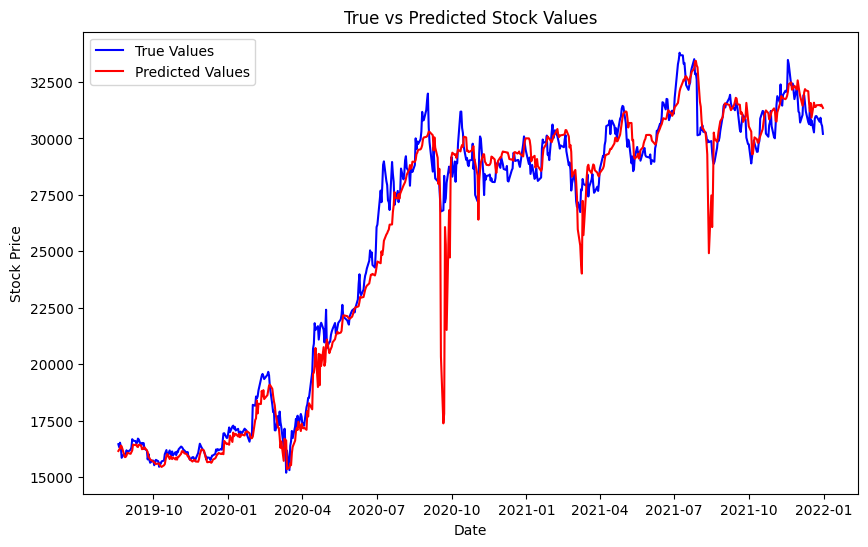

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Function to get the most related stocks for a given stock
def get_related_stocks(stock_ticker, correlation_data, top_n=5):
    related_stocks = correlation_data[correlation_data['Source'] == stock_ticker]
    related_stocks = related_stocks.sort_values(by='Correlation', ascending=False).head(top_n)
    return related_stocks['Target'].tolist()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for LSTM
X, y = prepare_data(scaled_data, n_steps)

# Load correlation data
correlation_data = pd.read_csv('correlation_data.csv')

# Get the most related stocks for the user-given stock
related_stocks = get_related_stocks(ticker, correlation_data)

# Load stock market data
stock_market_data = pd.read_csv('stock_market_data.csv')

# Get data for target stock and related stocks
target_stock_data = stock_market_data[stock_market_data['Ticker'] == ticker]
related_stocks_data = stock_market_data[stock_market_data['Ticker'].isin(related_stocks)]

# Filter target stock data to include only dates where related stock data is available
start_date_target = target_stock_data['Date'].iloc[0]
end_date_target = target_stock_data['Date'].iloc[-1]
related_stocks_data_filtered = related_stocks_data[(related_stocks_data['Date'] >= start_date_target) & (related_stocks_data['Date'] <= end_date_target)]

# Ensure that both datasets have the same length
min_length = min(len(target_stock_data), len(related_stocks_data_filtered))
X_target, y_target = prepare_data(target_stock_data['Close'].values[:min_length].reshape(-1, 1), n_steps)
X_related, y_related = prepare_data(related_stocks_data_filtered['Close'].values[:min_length].reshape(-1, 1), n_steps)

# Concatenate target and related stocks data
X = np.concatenate((X_target, X_related), axis=2)
y = y_target  # Use target stock's close prices for prediction

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
X_input = Input(shape=(n_steps, X.shape[2]))
lstm_layer = LSTM(64, activation='relu')(X_input)
output_layer = Dense(1)(lstm_layer)

model = Model(inputs=X_input, outputs=output_layer)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 1258653.5335871028
Mean Absolute Error (MAE): 676.0782308360035
Mean Absolute Percentage Error (MAPE): 2.6025453497157773


**GRU**

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 5s 21ms/step - loss: 0.0014 - val_loss: 1.0584e-04
Epoch 2/100
68/68 [==============================] - 1s 14ms/step - loss: 9.7394e-06 - val_loss: 1.0109e-04
Epoch 3/100
68/68 [==============================] - 1s 14ms/step - loss: 8.2884e-06 - val_loss: 1.2452e-04
Epoch 4/100
68/68 [==============================] - 1s 14ms/step - loss: 8.4302e-06 - val_loss: 9.7968e-05
Epoch 5/100
68/68 [==============================] - 1s 14ms/step - loss: 8.9713e-06 - val_loss: 1.0226e-04
Epoch 6/100
68/68 [==============================] - 1s 21ms/step - loss: 8.3555e-06 - val_loss: 9.4777e-05
Epoch 7/100
68/68 [==============================] - 1s 22ms/step - loss: 7.6539e-06 - val_loss: 9.5036e-05
Epoch 8/100
68/68 [==============================] - 1s 14ms/step - loss: 7.3636e-06 - val_loss: 9.4156e-05
Epoch 9/100
68/68 [==============================] - 1s 14ms/step - loss: 8.0513e-06 - val_loss: 9.5921e-05
Epoch 10/100
68/68 [============

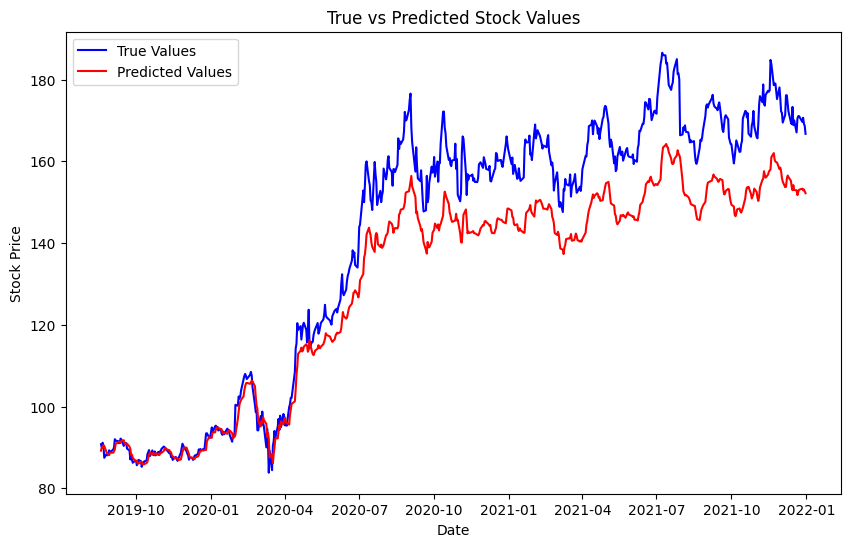

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for GRU
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for GRU
X, y = prepare_data(scaled_data, n_steps)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for GRU (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build GRU model
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 172.56594055325743
Mean Absolute Error (MAE): 10.993858974246628
Mean Absolute Percentage Error (MAPE): 6.931896753382244


# Combining Relational Graph with GRU and GCN for Mutation Points

Enter the target stock ticker: AMZN
Most related stocks for AMZN : ['AMZN', 'LLY', 'AZO', 'AZN', 'ABT']
Epoch 1/10
453/453 [==============================] - 5s 8ms/step - loss: 1.9120e-04 - val_loss: 4.4818e-04
Epoch 2/10
453/453 [==============================] - 3s 7ms/step - loss: 7.8348e-06 - val_loss: 3.7624e-04
Epoch 3/10
453/453 [==============================] - 4s 9ms/step - loss: 7.3889e-06 - val_loss: 3.4593e-04
Epoch 4/10
453/453 [==============================] - 3s 6ms/step - loss: 7.1267e-06 - val_loss: 3.2083e-04
Epoch 5/10
453/453 [==============================] - 3s 7ms/step - loss: 7.2875e-06 - val_loss: 3.0243e-04
Epoch 6/10
453/453 [==============================] - 3s 7ms/step - loss: 7.3165e-06 - val_loss: 2.9613e-04
Epoch 7/10
453/453 [==============================] - 4s 9ms/step - loss: 6.7198e-06 - val_loss: 3.6469e-04
Epoch 8/10
453/453 [==============================] - 3s 7ms/step - loss: 7.9492e-06 - val_loss: 2.9280e-04
Epoch 9/10
453/453 [============

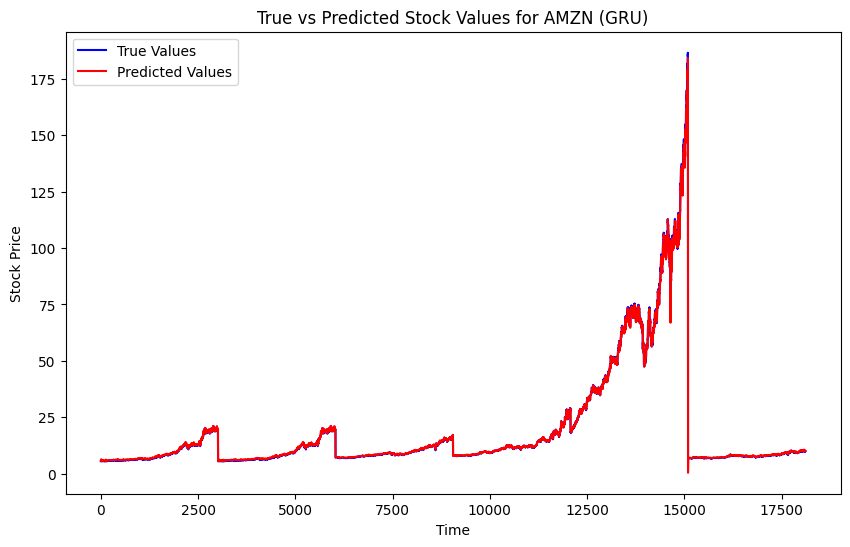

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from collections import deque

# Load correlation data
correlation_data = pd.read_csv('correlation_data.csv')

# Define function to get the most related stocks for a given stock
def get_related_stocks(stock_ticker, correlation_data, top_n=5):
    related_stocks = correlation_data[correlation_data['Source'] == stock_ticker]
    related_stocks = related_stocks.sort_values(by='Correlation', ascending=False).head(top_n)
    return related_stocks['Target'].tolist()

# Get stock ticker from user
target_stock_ticker = input("Enter the target stock ticker: ")

# Get the most related stocks for the user-given stock
related_stocks = get_related_stocks(target_stock_ticker, correlation_data)

# Print the most related stocks
print("Most related stocks for", target_stock_ticker, ":", related_stocks)

# Load stock market data
stock_market_data = pd.read_csv('stock_market_data.csv')

# Define function to get data for a specific stock and its related stocks
def get_stock_data(stock_ticker, related_stocks):
    # Get data for the target stock
    target_stock_data = stock_market_data[stock_market_data['Ticker'] == stock_ticker]

    # Get data for related stocks
    related_stocks_data = stock_market_data[stock_market_data['Ticker'].isin(related_stocks)]

    return target_stock_data, related_stocks_data

# Define function to prepare data for the model
def prepare_data(target_stock_data, related_stocks_data, window_size):
    scaler = MinMaxScaler()

    # Combine target stock and related stocks data
    all_data = pd.concat([target_stock_data, related_stocks_data])

    # Normalize data
    scaled_data = scaler.fit_transform(all_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

    # Prepare input sequences
    X = []
    y = []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size][3])  # Predicting the 'Close' price of the target stock
    X = np.array(X)
    y = np.array(y)

    return X, y

# Define function to build GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Get data for target stock and related stocks
target_stock_data, related_stocks_data = get_stock_data(target_stock_ticker, related_stocks)

# Prepare data for the model
window_size = 10
X, y = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape data for GRU input
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Build and train the model
model = build_model((X.shape[1], X.shape[2]))
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Test the model and predict values
# Prepare test data
X_test, y_test = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape test data for GRU input
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Predict using the trained model
y_pred = model.predict(X_test)

# Inverse scaling for predictions
scaler_output = MinMaxScaler()
scaler_output.fit(target_stock_data[['Close']])
y_test_inv = scaler_output.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_output.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values', color='blue')
plt.plot(y_pred_inv, label='Predicted Values', color='red')
plt.title('True vs Predicted Stock Values for ' + target_stock_ticker + ' (GRU)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 2.0502497847576246
Mean Absolute Error (MAE): 0.29002670212035864
Mean Absolute Percentage Error (MAPE): 2.2316377012222155


**GRNN**

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 11s 56ms/step - loss: 0.0015 - val_loss: 1.5859e-04
Epoch 2/100
68/68 [==============================] - 2s 26ms/step - loss: 1.2180e-05 - val_loss: 1.6852e-04
Epoch 3/100
68/68 [==============================] - 2s 33ms/step - loss: 1.0678e-05 - val_loss: 1.2285e-04
Epoch 4/100
68/68 [==============================] - 2s 33ms/step - loss: 1.0614e-05 - val_loss: 1.2284e-04
Epoch 5/100
68/68 [==============================] - 2s 26ms/step - loss: 1.0461e-05 - val_loss: 1.2639e-04
Epoch 6/100
68/68 [==============================] - 2s 26ms/step - loss: 1.0924e-05 - val_loss: 1.6168e-04
Epoch 7/100
68/68 [==============================] - 2s 26ms/step - loss: 1.0091e-05 - val_loss: 1.2490e-04
Epoch 8/100
68/68 [==============================] - 2s 26ms/step - loss: 9.9121e-06 - val_loss: 1.2276e-04
Epoch 9/100
68/68 [==============================] - 2s 26ms/step - loss: 9.4771e-06 - val_loss: 1.1323e-04
Epoch 10/100
68/68 [===========

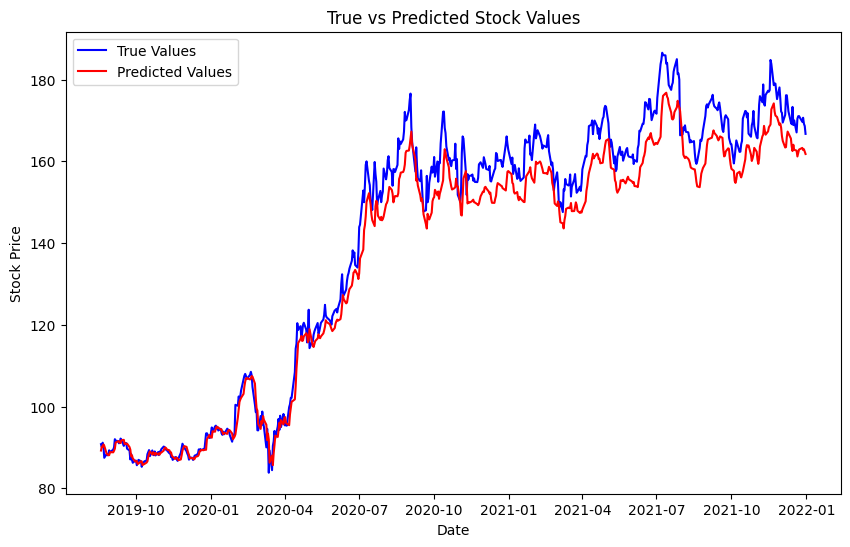

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, GRU, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for GRNN
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for GRNN
X, y = prepare_data(scaled_data, n_steps)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build GRNN model
X_input = Input(shape=(n_steps, 1))
gru_layer = GRU(64, activation='relu', return_sequences=True)(X_input)
gru_layer = GRU(64, activation='relu')(gru_layer)
output_layer = Dense(1)(gru_layer)

model = Model(inputs=X_input, outputs=output_layer)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 39.76136412383638
Mean Absolute Error (MAE): 5.128072098618955
Mean Absolute Percentage Error (MAPE): 3.3225435044663647


# Combining Relational Graph with GRNN and GCN for Mutation Points

Enter the target stock ticker: AMZN
Most related stocks for AMZN : ['AMZN', 'LLY', 'AZO', 'AZN', 'ABT']
Epoch 1/10
453/453 [==============================] - 30s 38ms/step - loss: 2.2506e-04 - val_loss: 7.6460e-04
Epoch 2/10
453/453 [==============================] - 17s 37ms/step - loss: 1.3668e-05 - val_loss: 6.8027e-04
Epoch 3/10
453/453 [==============================] - 12s 27ms/step - loss: 1.3581e-05 - val_loss: 5.5489e-04
Epoch 4/10
453/453 [==============================] - 21s 47ms/step - loss: 1.3275e-05 - val_loss: 7.4711e-04
Epoch 5/10
453/453 [==============================] - 16s 36ms/step - loss: 1.3506e-05 - val_loss: 4.0796e-04
Epoch 6/10
453/453 [==============================] - 15s 33ms/step - loss: 1.0914e-05 - val_loss: 3.5283e-04
Epoch 7/10
453/453 [==============================] - 12s 25ms/step - loss: 1.0921e-05 - val_loss: 3.2573e-04
Epoch 8/10
453/453 [==============================] - 8s 17ms/step - loss: 9.6672e-06 - val_loss: 3.0666e-04
Epoch 9/10
453/45

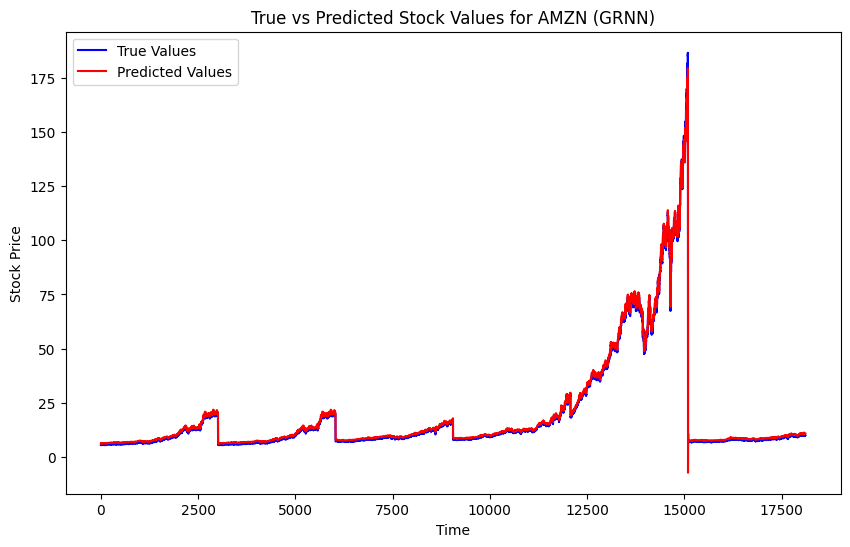

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from collections import deque

# Load correlation data
correlation_data = pd.read_csv('correlation_data.csv')

# Define function to get the most related stocks for a given stock
def get_related_stocks(stock_ticker, correlation_data, top_n=5):
    related_stocks = correlation_data[correlation_data['Source'] == stock_ticker]
    related_stocks = related_stocks.sort_values(by='Correlation', ascending=False).head(top_n)
    return related_stocks['Target'].tolist()

# Get stock ticker from user
target_stock_ticker = input("Enter the target stock ticker: ")

# Get the most related stocks for the user-given stock
related_stocks = get_related_stocks(target_stock_ticker, correlation_data)

# Print the most related stocks
print("Most related stocks for", target_stock_ticker, ":", related_stocks)

# Load stock market data
stock_market_data = pd.read_csv('stock_market_data.csv')

# Define function to get data for a specific stock and its related stocks
def get_stock_data(stock_ticker, related_stocks):
    # Get data for the target stock
    target_stock_data = stock_market_data[stock_market_data['Ticker'] == stock_ticker]

    # Get data for related stocks
    related_stocks_data = stock_market_data[stock_market_data['Ticker'].isin(related_stocks)]

    return target_stock_data, related_stocks_data

# Define function to prepare data for the model
def prepare_data(target_stock_data, related_stocks_data, window_size):
    scaler = MinMaxScaler()

    # Combine target stock and related stocks data
    all_data = pd.concat([target_stock_data, related_stocks_data])

    # Normalize data
    scaled_data = scaler.fit_transform(all_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

    # Prepare input sequences
    X = []
    y = []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size][3])  # Predicting the 'Close' price of the target stock
    X = np.array(X)
    y = np.array(y)

    return X, y

# Define function to build GRNN model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, return_sequences=True))
    model.add(GRU(50))  # Last GRU layer, no return_sequences=True
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Get data for target stock and related stocks
target_stock_data, related_stocks_data = get_stock_data(target_stock_ticker, related_stocks)

# Prepare data for the model
window_size = 10
X, y = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape data for GRNN input
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Build and train the model
model = build_model((X.shape[1], X.shape[2]))
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Test the model and predict values
# Prepare test data
X_test, y_test = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape test data for GRNN input
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Predict using the trained model
y_pred = model.predict(X_test)

# Inverse scaling for predictions
scaler_output = MinMaxScaler()
scaler_output.fit(target_stock_data[['Close']])
y_test_inv = scaler_output.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_output.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values', color='blue')
plt.plot(y_pred_inv, label='Predicted Values', color='red')
plt.title('True vs Predicted Stock Values for ' + target_stock_ticker + ' (GRNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 2.6149957156588313
Mean Absolute Error (MAE): 0.8527291816019873
Mean Absolute Percentage Error (MAPE): 7.892589532160159


# Testing for comparision of original ML model

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 10s 88ms/step - loss: 5.1560 - val_loss: 1.5746
Epoch 2/100
68/68 [==============================] - 4s 65ms/step - loss: 0.1723 - val_loss: 1.4151
Epoch 3/100
68/68 [==============================] - 6s 89ms/step - loss: 0.1653 - val_loss: 2.2236
Epoch 4/100
68/68 [==============================] - 5s 68ms/step - loss: 0.2112 - val_loss: 1.3092
Epoch 5/100
68/68 [==============================] - 5s 74ms/step - loss: 0.1523 - val_loss: 1.2065
Epoch 6/100
68/68 [==============================] - 7s 100ms/step - loss: 0.2138 - val_loss: 1.1390
Epoch 7/100
68/68 [==============================] - 5s 69ms/step - loss: 0.1514 - val_loss: 1.5238
Epoch 8/100
68/68 [==============================] - 5s 75ms/step - loss: 0.1424 - val_loss: 1.2984
Epoch 9/100
68/68 [==============================] - 6s 83ms/step - loss: 0.1677 - val_loss: 1.5693
Epoch 10/100
68/68 [==============================] - 4s 61ms/step - loss: 0.1764 - val_loss: 1.44

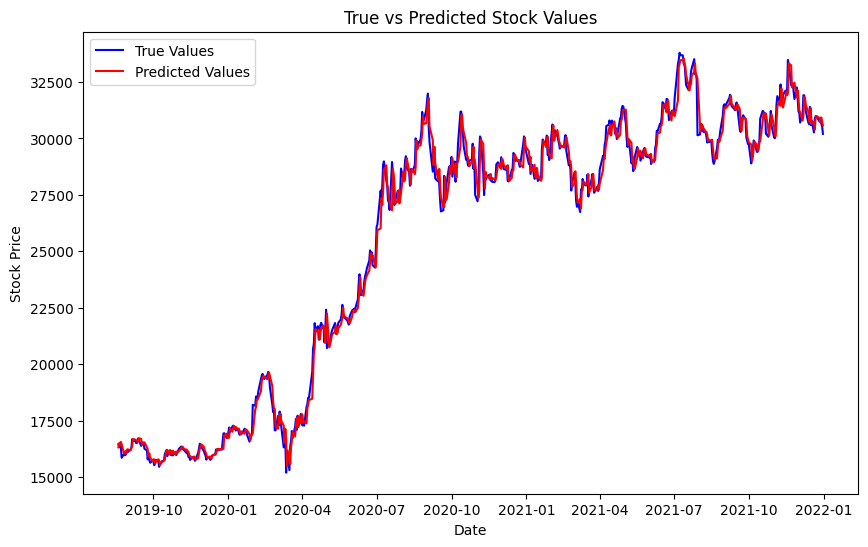

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, GRU, Dense, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for GRNN
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for GRNN
X, y = prepare_data(scaled_data, n_steps)

# Load correlation data
correlation_data = pd.read_csv('correlation_data.csv')

# Define function to get the most related stocks for a given stock
def get_related_stocks(stock_ticker, correlation_data, top_n=5):
    related_stocks = correlation_data[correlation_data['Source'] == stock_ticker]
    related_stocks = related_stocks.sort_values(by='Correlation', ascending=False).head(top_n)
    return related_stocks['Target'].tolist()

# Get the most related stocks for the user-given stock
related_stocks = get_related_stocks(ticker, correlation_data)

# Load stock market data
stock_market_data = pd.read_csv('stock_market_data.csv')

# Get data for target stock and related stocks
target_stock_data = stock_market_data[stock_market_data['Ticker'] == ticker]
related_stocks_data = stock_market_data[stock_market_data['Ticker'].isin(related_stocks)]

# Filter target stock data to include only dates where related stock data is available
start_date_target = target_stock_data['Date'].iloc[0]
end_date_target = target_stock_data['Date'].iloc[-1]
related_stocks_data_filtered = related_stocks_data[(related_stocks_data['Date'] >= start_date_target) & (related_stocks_data['Date'] <= end_date_target)]

# Ensure that both datasets have the same length
min_length = min(len(target_stock_data), len(related_stocks_data_filtered))
X_target, y_target = prepare_data(target_stock_data['Close'].values[:min_length].reshape(-1, 1), n_steps)
X_related, y_related = prepare_data(related_stocks_data_filtered['Close'].values[:min_length].reshape(-1, 1), n_steps)

# Concatenate target and related stocks data
X = np.concatenate((X_target, X_related), axis=2)
y = y_target  # Use target stock's close prices for prediction

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build GRNN model
X_input = Input(shape=(n_steps, X.shape[2]))
gru_layer = GRU(64, activation='relu', return_sequences=True)(X_input)
gru_layer = GRU(64, activation='relu')(gru_layer)
output_layer = Dense(1)(gru_layer)

model = Model(inputs=X_input, outputs=output_layer)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the
# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 325523.5847416225
Mean Absolute Error (MAE): 422.8148062428032
Mean Absolute Percentage Error (MAPE): 1.6393397463250743


**CNN**

Enter the ticker symbol (e.g., AAPL for Apple): AMZN


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
68/68 [==============================] - 5s 18ms/step - loss: 7.8173e-04 - val_loss: 6.1341e-04
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 3.6124e-05 - val_loss: 8.5581e-04
Epoch 3/100
68/68 [==============================] - 1s 10ms/step - loss: 4.0991e-05 - val_loss: 8.3279e-04
Epoch 4/100
68/68 [==============================] - 1s 8ms/step - loss: 3.2923e-05 - val_loss: 4.8496e-04
Epoch 5/100
68/68 [==============================] - 1s 9ms/step - loss: 3.2028e-05 - val_loss: 4.7917e-04
Epoch 6/100
68/68 [==============================] - 1s 9ms/step - loss: 3.3442e-05 - val_loss: 8.8422e-04
Epoch 7/100
68/68 [==============================] - 1s 11ms/step - loss: 3.1499e-05 - val_loss: 7.8083e-04
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 2.9643e-05 - val_loss: 2.7778e-04
Epoch 9/100
68/68 [==============================] - 1s 14ms/step - loss: 2.5827e-05 - val_loss: 4.4658e-04
Epoch 10/100
68/68 [============

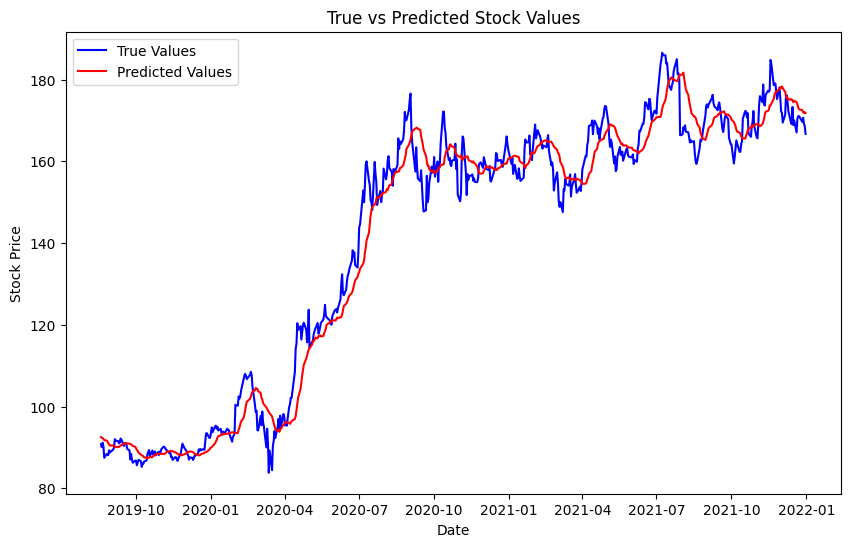

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import Huber
import yfinance as yf

# Function to prepare data for CNN
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Function to plot true vs predicted values
def plot_true_vs_predicted(true_values, predicted_values, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, true_values, label='True Values', color='blue')
    plt.plot(dates, predicted_values, label='Predicted Values', color='red')
    plt.title('True vs Predicted Stock Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Input ticker symbol
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

# Load data
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define number of timesteps
n_steps = 30

# Prepare data for CNN
X, y = prepare_data(scaled_data, n_steps)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for CNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=Huber())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling for predictions
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot true vs predicted values
plot_true_vs_predicted(y_test_inv, y_pred_inv, data.index[train_size+n_steps:train_size+n_steps+len(y_test_inv)])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 33.29423411163505
Mean Absolute Error (MAE): 4.364757060208583
Mean Absolute Percentage Error (MAPE): 3.109054941083585


# Combining Relational Graph with CNN and GCN for Mutation Points

Enter the target stock ticker: AMZN
Most related stocks for AMZN : ['AMZN', 'LLY', 'AZO', 'AZN', 'ABT']
Epoch 1/10
453/453 [==============================] - 2s 3ms/step - loss: 2.3341e-04 - val_loss: 0.0012
Epoch 2/10
453/453 [==============================] - 1s 3ms/step - loss: 2.0808e-05 - val_loss: 7.2749e-04
Epoch 3/10
453/453 [==============================] - 1s 2ms/step - loss: 1.8003e-05 - val_loss: 5.7357e-04
Epoch 4/10
453/453 [==============================] - 1s 2ms/step - loss: 1.2328e-05 - val_loss: 3.7650e-04
Epoch 5/10
453/453 [==============================] - 1s 2ms/step - loss: 1.3359e-05 - val_loss: 3.4280e-04
Epoch 6/10
453/453 [==============================] - 1s 3ms/step - loss: 1.1521e-05 - val_loss: 3.2936e-04
Epoch 7/10
453/453 [==============================] - 3s 6ms/step - loss: 1.1402e-05 - val_loss: 3.5579e-04
Epoch 8/10
453/453 [==============================] - 3s 6ms/step - loss: 1.2813e-05 - val_loss: 3.2638e-04
Epoch 9/10
453/453 [================

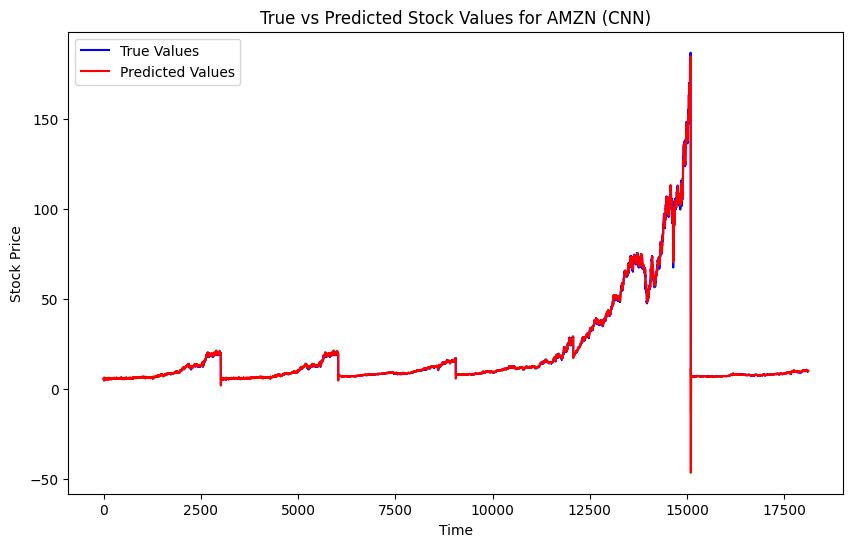

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from collections import deque

# Load correlation data
correlation_data = pd.read_csv('correlation_data.csv')

# Define function to get the most related stocks for a given stock
def get_related_stocks(stock_ticker, correlation_data, top_n=5):
    related_stocks = correlation_data[correlation_data['Source'] == stock_ticker]
    related_stocks = related_stocks.sort_values(by='Correlation', ascending=False).head(top_n)
    return related_stocks['Target'].tolist()

# Get stock ticker from user
target_stock_ticker = input("Enter the target stock ticker: ")

# Get the most related stocks for the user-given stock
related_stocks = get_related_stocks(target_stock_ticker, correlation_data)

# Print the most related stocks
print("Most related stocks for", target_stock_ticker, ":", related_stocks)

# Load stock market data
stock_market_data = pd.read_csv('stock_market_data.csv')

# Define function to get data for a specific stock and its related stocks
def get_stock_data(stock_ticker, related_stocks):
    # Get data for the target stock
    target_stock_data = stock_market_data[stock_market_data['Ticker'] == stock_ticker]

    # Get data for related stocks
    related_stocks_data = stock_market_data[stock_market_data['Ticker'].isin(related_stocks)]

    return target_stock_data, related_stocks_data

# Define function to prepare data for the model
def prepare_data(target_stock_data, related_stocks_data, window_size):
    scaler = MinMaxScaler()

    # Combine target stock and related stocks data
    all_data = pd.concat([target_stock_data, related_stocks_data])

    # Normalize data
    scaled_data = scaler.fit_transform(all_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

    # Prepare input sequences
    X = []
    y = []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size][3])  # Predicting the 'Close' price of the target stock
    X = np.array(X)
    y = np.array(y)

    return X, y

# Define function to build CNN model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Get data for target stock and related stocks
target_stock_data, related_stocks_data = get_stock_data(target_stock_ticker, related_stocks)

# Prepare data for the model
window_size = 10
X, y = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape data for CNN input
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Build and train the model
model = build_model((X.shape[1], X.shape[2]))
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Test the model and predict values
# Prepare test data
X_test, y_test = prepare_data(target_stock_data, related_stocks_data, window_size)

# Reshape test data for CNN input
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Predict using the trained model
y_pred = model.predict(X_test)

# Inverse scaling for predictions
scaler_output = MinMaxScaler()
scaler_output.fit(target_stock_data[['Close']])
y_test_inv = scaler_output.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_output.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values', color='blue')
plt.plot(y_pred_inv, label='Predicted Values', color='red')
plt.title('True vs Predicted Stock Values for ' + target_stock_ticker + ' (CNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 2.3911913208914157
Mean Absolute Error (MAE): 0.26858880774725313
Mean Absolute Percentage Error (MAPE): 1.6015912125479166
